In [ ]:
Implement Agglomerative hierarchical clustering algorithm using appropriate dataset. 

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features

In [3]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X_scaled)

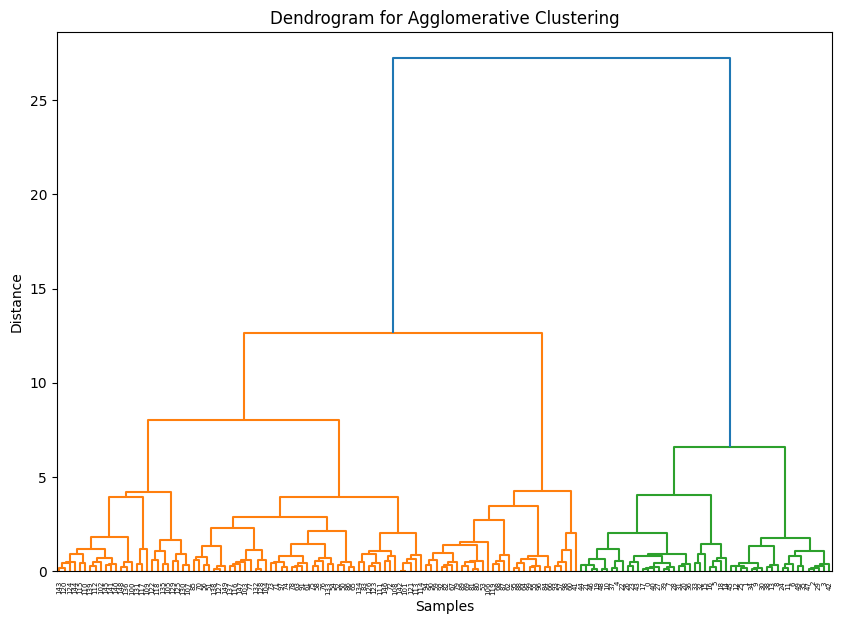

In [5]:
# Plot the dendrogram
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

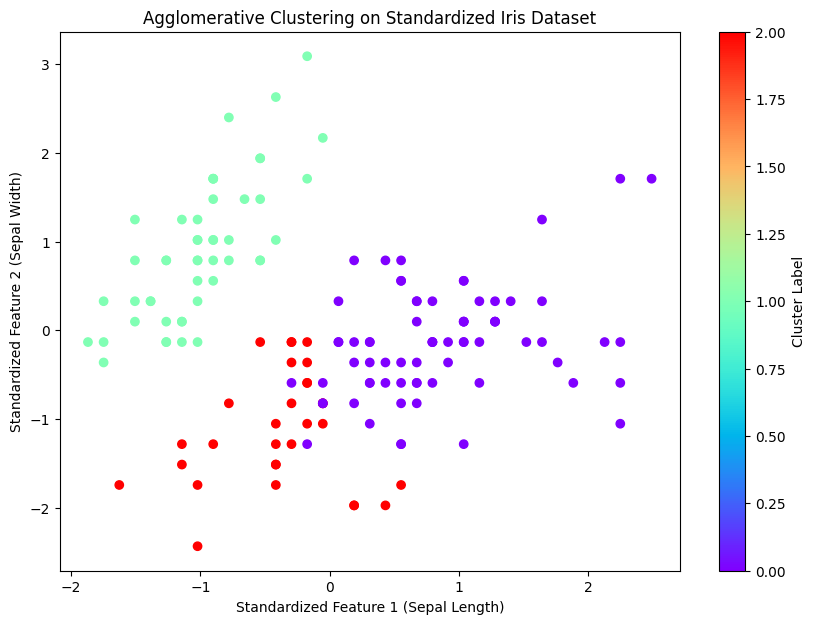

In [6]:
# Plot the clusters (using 2D projection for visualization)
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='rainbow')
plt.title('Agglomerative Clustering on Standardized Iris Dataset')
plt.xlabel('Standardized Feature 1 (Sepal Length)')
plt.ylabel('Standardized Feature 2 (Sepal Width)')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
Theory:
Agglomerative Hierarchical Clustering is a bottom-up approach for grouping similar objects based on their distance or similarity. Unlike other clustering methods that require the number of clusters to be specified beforehand, hierarchical clustering builds a hierarchy of clusters, which can be cut at different levels to get the desired number of clusters.
Here’s a step-by-step explanation of the theory behind Agglomerative Hierarchical Clustering:
1. Initialization
•	Start with each data point as its own cluster.
•	Initially, we have as many clusters as data points. For example, if we have 10 data points, we start with 10 clusters.
2. Distance Calculation
•	Calculate the distance between every pair of clusters (initially individual points). This can be done using various distance metrics such as:
o	Euclidean Distance: Commonly used when features are numerical.
o	Manhattan Distance: Alternative distance metric.
o	Cosine Similarity: Used for text data where the data points are vectors.
3. Merge Closest Clusters
•	Merge the two clusters that are closest together (i.e., the two clusters that have the minimum distance between them).
•	After merging, the number of clusters decreases by one.
•	The process repeats, recalculating the distance between the new cluster and all other clusters after each merge.
4. Update Distance Matrix
•	After each merge, the distance between clusters must be updated.
•	There are different strategies to update the distance between clusters after they are merged:
o	Single Linkage: The distance between two clusters is the minimum distance between any two points in the clusters.
o	Complete Linkage: The distance between two clusters is the maximum distance between any two points in the clusters.
o	Average Linkage: The distance is the average of the pairwise distances between all points in the two clusters.
o	Centroid Linkage: The distance is based on the centroids (mean of the points) of the clusters.
5. Repeat Until All Points Are Merged
•	The algorithm continues merging the closest clusters until only one cluster remains or until a stopping criterion (such as a desired number of clusters) is reached.
6. Dendrogram Construction
•	A dendrogram is a tree-like diagram that records the sequences of merges. Each merge corresponds to a node in the tree, and the height of the node indicates the distance at which the merge occurred.
•	By cutting the dendrogram at a specific height, you can select the number of clusters you desire. The shorter the height, the fewer clusters will be formed.
7. Choosing the Number of Clusters
•	One of the advantages of hierarchical clustering is that it doesn't require specifying the number of clusters beforehand.
•	The dendrogram can be used to visually inspect the hierarchy and decide where to cut the tree to form the desired number of clusters.
Advantages of Agglomerative Hierarchical Clustering
•	No need to specify the number of clusters: Unlike k-means, hierarchical clustering does not require the user to predefine the number of clusters.
•	Hierarchical structure: The dendrogram provides a clear visual representation of the clustering process and the hierarchy.
•	Versatile distance metrics: You can use a variety of distance metrics (Euclidean, Manhattan, etc.) depending on the type of data.
Disadvantages of Agglomerative Hierarchical Clustering
•	Computationally expensive: Hierarchical clustering can be quite slow, especially with large datasets, because it requires calculating and updating distances between clusters repeatedly.
•	Memory intensive: Storing the distance matrix can become memory-consuming as the number of data points increases.
•	Sensitive to noise: Like many other clustering methods, it is sensitive to outliers and noisy data points.
